In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [18]:
mpg=pd.read_csv('/content/auto-mpg_without nan.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,1982,Germany,vw pickup
389,32.0,4,135.0,84,2295,11.6,1982,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,1982,USA,ford ranger


In [19]:
mpg["origin"]=mpg["origin"].astype('category')
mpg["origin"]=mpg["origin"].cat.codes
mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,2,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,2,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,2,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,2,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,2,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,2,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,1982,0,vw pickup
389,32.0,4,135.0,84,2295,11.6,1982,2,dodge rampage
390,28.0,4,120.0,79,2625,18.6,1982,2,ford ranger


In [20]:
mpg.drop(mpg.columns[8:],axis=1,inplace=True)
mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,1970,2
1,15.0,8,350.0,165,3693,11.5,1970,2
2,18.0,8,318.0,150,3436,11.0,1970,2
3,16.0,8,304.0,150,3433,12.0,1970,2
4,17.0,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,2
388,44.0,4,97.0,52,2130,24.6,1982,0
389,32.0,4,135.0,84,2295,11.6,1982,2
390,28.0,4,120.0,79,2625,18.6,1982,2


In [21]:
x=mpg.iloc[:,1:]
y=mpg.iloc[:,0]

In [22]:
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [24]:
(x_train.shape,
y_train.shape)

((313, 7), (313,))

In [25]:
model_mpg=Sequential()

In [26]:
model_mpg.add(Dense(16,input_dim=7,activation='ReLU'))
model_mpg.add(Dense(4))
model_mpg.add(Dense(1))

In [27]:
model_mpg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                128       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model_mpg.compile(loss='mae', optimizer ='sgd',metrics='mse')

In [13]:
var=model_mpg.fit(x_train,y_train,epochs=500,verbose=2) #verbose:It only affects the output apperance

Epoch 1/500
10/10 - 1s - loss: 23.3105 - 1s/epoch - 103ms/step
Epoch 2/500
10/10 - 0s - loss: 22.3969 - 33ms/epoch - 3ms/step
Epoch 3/500
10/10 - 0s - loss: 21.1659 - 32ms/epoch - 3ms/step
Epoch 4/500
10/10 - 0s - loss: 19.0127 - 33ms/epoch - 3ms/step
Epoch 5/500
10/10 - 0s - loss: 14.5371 - 29ms/epoch - 3ms/step
Epoch 6/500
10/10 - 0s - loss: 10.4097 - 41ms/epoch - 4ms/step
Epoch 7/500
10/10 - 0s - loss: 9.3478 - 27ms/epoch - 3ms/step
Epoch 8/500
10/10 - 0s - loss: 8.7550 - 28ms/epoch - 3ms/step
Epoch 9/500
10/10 - 0s - loss: 8.1035 - 36ms/epoch - 4ms/step
Epoch 10/500
10/10 - 0s - loss: 7.4349 - 32ms/epoch - 3ms/step
Epoch 11/500
10/10 - 0s - loss: 6.7187 - 28ms/epoch - 3ms/step
Epoch 12/500
10/10 - 0s - loss: 5.9892 - 44ms/epoch - 4ms/step
Epoch 13/500
10/10 - 0s - loss: 5.4337 - 29ms/epoch - 3ms/step
Epoch 14/500
10/10 - 0s - loss: 4.8591 - 27ms/epoch - 3ms/step
Epoch 15/500
10/10 - 0s - loss: 4.4587 - 28ms/epoch - 3ms/step
Epoch 16/500
10/10 - 0s - loss: 4.2722 - 50ms/epoch - 5ms/

In [14]:
y_predict=model_mpg.predict(x_test)
y_predict

3/3 [==============================] - 0s 5ms/step


array([[27.270905],
       [23.738358],
       [34.842224],
       [23.876675],
       [27.982214],
       [29.934769],
       [11.782188],
       [30.202553],
       [18.861706],
       [32.348957],
       [13.615276],
       [20.538517],
       [15.744718],
       [28.981163],
       [17.96968 ],
       [28.891861],
       [18.62738 ],
       [32.673866],
       [27.113962],
       [29.203228],
       [17.727493],
       [37.953743],
       [35.59638 ],
       [14.838475],
       [30.38836 ],
       [25.414175],
       [20.854935],
       [16.38908 ],
       [31.351593],
       [24.275652],
       [14.263374],
       [20.084396],
       [18.024933],
       [30.978418],
       [13.611517],
       [36.465683],
       [13.161295],
       [23.780315],
       [12.967975],
       [10.313192],
       [14.0397  ],
       [28.620413],
       [35.30616 ],
       [27.016838],
       [13.896538],
       [11.925786],
       [17.105858],
       [32.92959 ],
       [21.912373],
       [31.373661],


<function matplotlib.pyplot.show(close=None, block=None)>

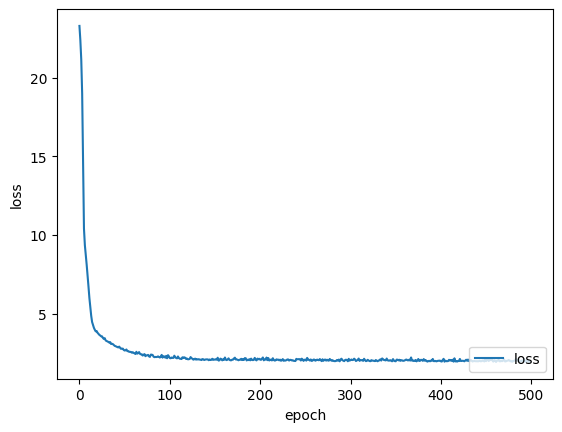

In [15]:
plt.plot((var.history['loss']),label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show

In [16]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.8617102363599485
